In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import re

In [2]:
# Opens all the csv files for all the schools we scraped

In [3]:
ucsc_files = open('./184_project/UCSC files.csv')
df_ucsc = pd.read_csv(ucsc_files)

uci_files = open('./184_project/UCI/UCI files.csv')
df_uci = pd.read_csv(uci_files)

sdsu_files = open('./184_project/SDSU/SDSU files.csv')
df_sdsu = pd.read_csv(sdsu_files)

chico_files = open('./184_project/CHICO/CHICO files.csv')
df_chico = pd.read_csv(chico_files)

sfsu_files = open('./184_project/SF State/SF_State_Data.csv')
df_sfsu = pd.read_csv(sfsu_files)

harveymud_files = open('./184_project/Harvey_files.csv')
df_harvey = pd.read_csv(harveymud_files)

panoma_files = open('./184_project/Pomona_files.csv')
df_panoma = pd.read_csv(panoma_files)

rice_files = open('./184_project/RICE/RICE files.csv')
df_rice = pd.read_csv(rice_files)

In [4]:
#Goes through all the schools and cleans up the term to a specific format (season + ' ' + year).

In [5]:
real_cols = ['num_people_enrolled', 'total_class_size', 'class_num', 'term', 'professor']
df_rice.columns = real_cols
df_rice
for row_num,i in enumerate(df_rice.iloc[:,3]):
    term_split = i.split('2')
    if term_split[0] == 'FALL':
        term_split[0] = 'Fall'
        term_split[1] = '2' + term_split[1]
    elif term_split[0] == 'SPRING':
        term_split[0] = 'Spring'
        term_split[1] = '2' + term_split[1]
    if len(term_split) == 3:
        term_split = [term_split[0], term_split[1] + '2']
    season_year = term_split[0] + ' ' + term_split[1]
    df_rice.at[row_num, 'term'] = season_year.upper()   


In [6]:
for row_num, i in enumerate(df_harvey.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_harvey.at[row_num, 'term'] = term_split[0] +' ' + term_split[1]


In [7]:
for row_num, i in enumerate(df_panoma.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year_last = term_split[1].split('0')
        term_split[1] = '200' + year_last[1]
    df_panoma.at[row_num, 'term'] = term_split[0] + ' ' + term_split[1]


In [8]:
for row_num, i in enumerate(df_chico.iloc[:,3]):
    term_split = i.split('2')
    if term_split[0] == 'fa':
        term_split[0] = 'Fall'
        term_split[1] = '2' + term_split[1]
    elif term_split[0] == 'spr':
        term_split[0] = 'Spring'
        term_split[1] = '2' + term_split[1]
    if len(term_split) == 3:
        term_split = [term_split[0], term_split[1] + '2']
    season_year = term_split[0] + ' ' + term_split[1]
    df_chico.at[row_num, 'term'] = season_year.upper()

In [9]:
for row_num, i in enumerate(df_sfsu.iloc[:,1]):
    term_split = i.split(' ')
    season_year = term_split[0] + ' ' + term_split[1]
    df_sfsu.at[row_num, 'term'] = season_year.upper()

for row_num, class_num in enumerate(df_sfsu['class_number']):
    class_split = class_num.split(' ')
    df_sfsu.at[row_num, 'class_number'] = class_split[0] + class_split[1]    

In [10]:
for row_num, i in enumerate(df_sdsu.iloc[:,3]):
    term_split = i.split(' ')
    if len(term_split[0]) == 1:
        term_split[0] = '200' + term_split[0]
    else:
        term_split[0] = '20' + term_split[0]
    df_sdsu.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [11]:
for row_num, i in enumerate(df_uci.iloc[:,3]):
    term_split = i.split(' ')
    df_uci.at[row_num, 'term'] = (term_split[1] + ' ' + term_split[0]).upper()


In [12]:
for row_num, i in enumerate(df_ucsc.iloc[:, 3]):
    term_split = i.split(' ')
    if len(term_split[1]) < 4:
        year = term_split[1].split('0')
        new_year = year[0] + '00' + year[1]
        term_split[1] = new_year
    df_ucsc.at[row_num, 'term'] = (term_split[0] + ' ' + term_split[1]).upper()


In [13]:
# Goes through all the data and adds the percentages of class to the end of the dataframe

In [14]:
def add_percentage(self, num_enroll, total_size):
    self['Percentage'] = 0.
    for row_num, i in enumerate(self.iloc[:, num_enroll]):
        try:
            float(self.iloc[row_num, total_size])
        except:
            self.iloc[row_num,total_size] = self.iloc[row_num, total_size].split('W')[0]
        if float(self.iloc[row_num, total_size]) == 0:
            self.iloc[row_num, total_size] = self.iloc[row_num, num_enroll]
        if float(self.iloc[row_num, total_size]) == 0 and float(self.iloc[row_num, num_enroll]) ==0:
            self.iloc[row_num, total_size ] = 1;
        percentage = float(self.iloc[row_num, num_enroll])/float(self.iloc[row_num,total_size])
        if percentage > 1:
            percentage = 1
        if percentage <= 0:
            percentage = None
        self.at[row_num, 'Percentage'] = percentage
    return self

In [15]:
# Deletes all dataframe rows with Nan and cleans up the class

In [16]:
def clean_nan(self):
    self = self.replace(0.,np.NaN)
    self = self.dropna()
    return self

In [17]:
def clean_class_nums(self):
    for row_num,i in enumerate(self.iloc[:,2]):
        cs_classes = i.split(' ')
        self.iloc[row_num,2] = cs_classes[0].strip()
    return self

In [ ]:
# Changes rice university current enrollement to an integer and removes any values greater than 500.
# Any values greater than 500 are noise, and should be removed

In [18]:
for num, i in enumerate(df_rice.iloc[:,0]):
    df_rice.iloc[num, 0] = int(re.sub('[^0-9]', '', i))
    if int(df_rice.iloc[num,0]) >= 500:
        df_rice.iloc[num,0] = 0
    df_rice.iloc[num, 1] = int(re.sub('[^0-9]', '', df_rice.iloc[num,1]))
    
for num, i in enumerate(df_rice.iloc[:,2]):
    splitted = i.split()
    df_rice.iloc[num,2] = splitted[0] + splitted[1]


In [ ]:
# Adds the perccentages to every school and cleans up all NaN's in data.
# Change the data such that all data has the same columns indices.

In [19]:
add_percentage(df_chico, 0, 1)
add_percentage(df_sfsu, 3, 4)
add_percentage(df_ucsc, 0, 1)
add_percentage(df_sdsu, 0, 1)
add_percentage(df_uci, 0, 1)
add_percentage(df_harvey, 0, 1)
add_percentage(df_rice, 0, 1)

col = ['num_people_enrolled', 'total_class_size', 'class_number', 'term', 'Prof Name', 'Percentage', 'Unnamed: 0']
df_sfsu = df_sfsu.loc[:,col]
df_sfsu.drop('Unnamed: 0', axis = 1, inplace = True)
df_sfsu.columns = ['num_people_enrolled', 'total_class_size', 'class_number', 'term' ,'professor', 'Percentage']

df_chico = clean_nan(df_chico)
df_sdsu= clean_nan(df_sdsu)
df_ucsc = clean_nan(df_ucsc)
df_uci = clean_nan(df_uci)
df_sfsu = clean_nan(df_sfsu)
df_rice = clean_nan(df_rice)
df_harvey = clean_nan(df_harvey)

df_harvey = clean_class_nums(df_harvey)

In [20]:
# Splits the data into percentages for each term, so it makes it easier to plot

In [21]:
def getPercentages(self, term_location):
    unique_vals = []
    newData = []
    newTerm = []
    for i in self.iloc[:,term_location]:
        if i not in unique_vals:
            unique_vals.append(i)
    newTerm = list(unique_vals)
    for i in newTerm:
        newData.append(self.Percentage[self.term == i])
    return newData, newTerm

In [22]:
# Goes through each term and sorts the term with accordance to the data

In [23]:
def sort_term(term, data):
    to_sort = []
    for i in term:
        if 'FALL' in i:
            split = i.replace('FALL', '')
            split = split + '2'
        if 'SPRING' in i:
            split = i.replace('SPRING', '')
            split = split+'3'
        if 'WINTER' in i:
            split = i.replace('WINTER', '')
            split = split + '1'
        to_sort.append((int(int(split)%1000)))
    _, term, data = zip(*sorted(zip(to_sort, term, data)))
    return term, data

In [24]:
def term_to_num(term):
    quant = {'SPRING':.33, 'FALL':.66,  'WINTER':.99}
    df = pd.DataFrame()
    term_split = term.split(' ')
    return quant[term_split[0]] + int(term_split[1])

def floor_term_num(term):
    df = pd.DataFrame()
    return float(term.split()[1])

In [25]:
def avg(self, to_avg = 'term_num', data_avg = 'num_people_enrolled'):
    term_size = []
    unique_term = self[to_avg].unique()        
    for i in unique_term:
        term_selfdf = self[self[to_avg] == i]
        average_size = 0
        for i in term_selfdf[data_avg]:
            average_size += i
        term_size.append(average_size/len(term_selfdf))
    return term_size

In [26]:
def jitter(self, amount = .1):
    return self + amount * np.random.rand(len(self))- amount/2

In [ ]:
# Adds a term_num to the data so that when data is plot, spring, fall, and winter are equally distributed.
# Adds a year term to the data so when doing year graphs, they correlate to a year and not a term.
# Sorts every data frame by the term_num so that each dataframe is in order
# Removes any classes that have a class size of 2

In [27]:
df_uci['term_num'] = df_uci['term'].apply(term_to_num)
df_ucsc['term_num'] = df_ucsc['term'].apply(term_to_num)
df_chico['term_num'] = df_chico['term'].apply(term_to_num)
df_sdsu['term_num'] = df_sdsu['term'].apply(term_to_num)
df_harvey['term_num'] = df_harvey['term'].apply(term_to_num)
df_panoma['term_num'] = df_panoma['term'].apply(term_to_num)
df_sfsu['term_num'] = df_sfsu['term'].apply(term_to_num)
df_rice['term_num'] = df_rice['term'].apply(term_to_num)

df_ucsc = df_ucsc.sort_values(by = ['term_num'])
df_uci = df_uci.sort_values(by = ['term_num'])
df_chico = df_chico.sort_values(by = ['term_num'])
df_sdsu = df_sdsu.sort_values(by = ['term_num'])
df_harvey = df_harvey.sort_values(by = ['term_num'])
df_sfsu = df_sfsu.sort_values(by=['term_num'])
df_rice = df_rice.sort_values(by=['term_num'])

df_ucsc['year'] = df_ucsc['term'].apply(floor_term_num)
df_uci['year'] = df_uci['term'].apply(floor_term_num)
df_chico['year'] = df_chico['term'].apply(floor_term_num)
df_sdsu['year'] = df_sdsu['term'].apply(floor_term_num)
df_sfsu['year'] = df_sfsu['term'].apply(floor_term_num)
df_rice['year'] = df_rice['term'].apply(floor_term_num)
df_harvey['year'] = df_harvey['term'].apply(floor_term_num)

df_uci = df_uci[df_uci['num_people_enrolled'] >= 3]
df_ucsc = df_ucsc[df_ucsc['num_people_enrolled'] >= 3]
df_chico = df_chico[df_chico['num_people_enrolled'] >= 3]
df_sdsu = df_sdsu[df_sdsu['num_people_enrolled'] >= 3]
df_sfsu = df_sfsu[df_sfsu['num_people_enrolled'] >= 3]
df_harvey = df_harvey[df_harvey['num_people_enrolled'] >= 3]
df_rice = df_rice[df_rice['num_people_enrolled'] >= 3]

In [28]:
# Adds plots of average computer science students for every quarter

Text(0, 0.5, 'Number of Students Enrolled')

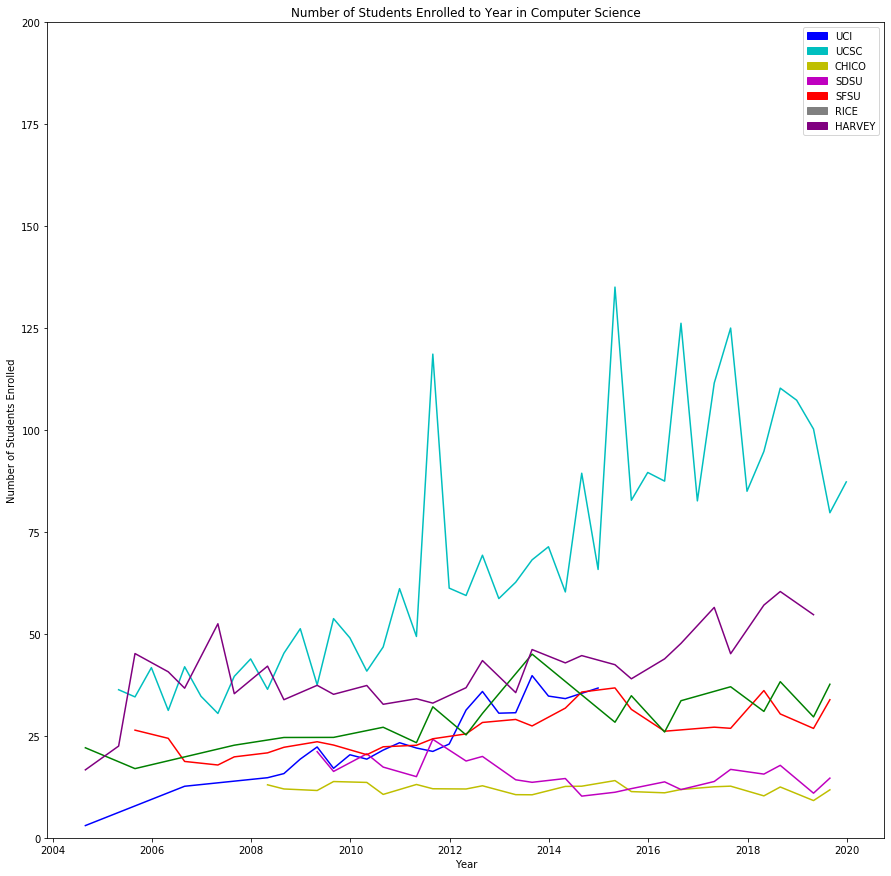

In [40]:
fig, axes = plt.subplots(1,1, figsize=(15,15))
plt.ylim((0,200))

uci_jitter, uci_n_jitter = jitter(df_uci['term_num'], .3), jitter(df_uci['num_people_enrolled'], 1)
ucsc_jitter, ucsc_n_jitter = jitter(df_ucsc['term_num'], .3), jitter(df_ucsc['num_people_enrolled'], 1)
chico_jitter, chico_n_jitter = jitter(df_chico['term_num'], .3), jitter(df_chico['num_people_enrolled'], 1)
sdsu_jitter, sdsu_n_jitter = jitter(df_sdsu['term_num'], .3), jitter(df_sdsu['num_people_enrolled'], 1)
sfsu_jitter, sfsu_n_jitter = jitter(df_sfsu['term_num'], .3), jitter(df_sfsu['num_people_enrolled'], 1)
harvey_jitter, harvey_n_jitter = jitter(df_harvey['term_num'], .3), jitter(df_harvey['num_people_enrolled'], 1)
rice_jitter, rice_n_jitter = jitter(df_rice['term_num'], .3), jitter(df_rice['num_people_enrolled'], 1)


axes.plot(df_uci['term_num'].unique(), avg(df_uci), 'b-')
axes.plot(df_ucsc['term_num'].unique(), avg(df_ucsc), 'c-')
axes.plot(df_chico['term_num'].unique(), avg(df_chico), 'y-')
axes.plot(df_sdsu['term_num'].unique(), avg(df_sdsu), 'm-')
axes.plot(df_sfsu['term_num'].unique(), avg(df_sfsu), 'r-')
axes.plot(df_harvey['term_num'].unique(), avg(df_harvey), 'g-')
axes.plot(df_rice['term_num'].unique(), avg(df_rice), 'purple')

uci_patch = mpatches.Patch(color='b', label='UCI')
ucsc_patch = mpatches.Patch(color='c', label='UCSC')
chico_patch = mpatches.Patch(color='y', label='CHICO')
sdsu_patch = mpatches.Patch(color='m', label='SDSU')
sfsu_patch = mpatches.Patch(color='r', label='SFSU')
rice_patch = mpatches.Patch(color = 'grey', label = 'RICE')
harvey_patch = mpatches.Patch(color = 'purple', label  = 'HARVEY')
plt.legend(handles=[uci_patch, ucsc_patch, chico_patch, sdsu_patch, sfsu_patch, rice_patch, harvey_patch])

axes.set_title('Number of Students Enrolled to Year in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Students Enrolled')


In [ ]:
# Add scatter plots for UC schools, state schools and private schools with the lines graphs as averages.

Text(0, 0.5, 'Number of Students Enrolled')

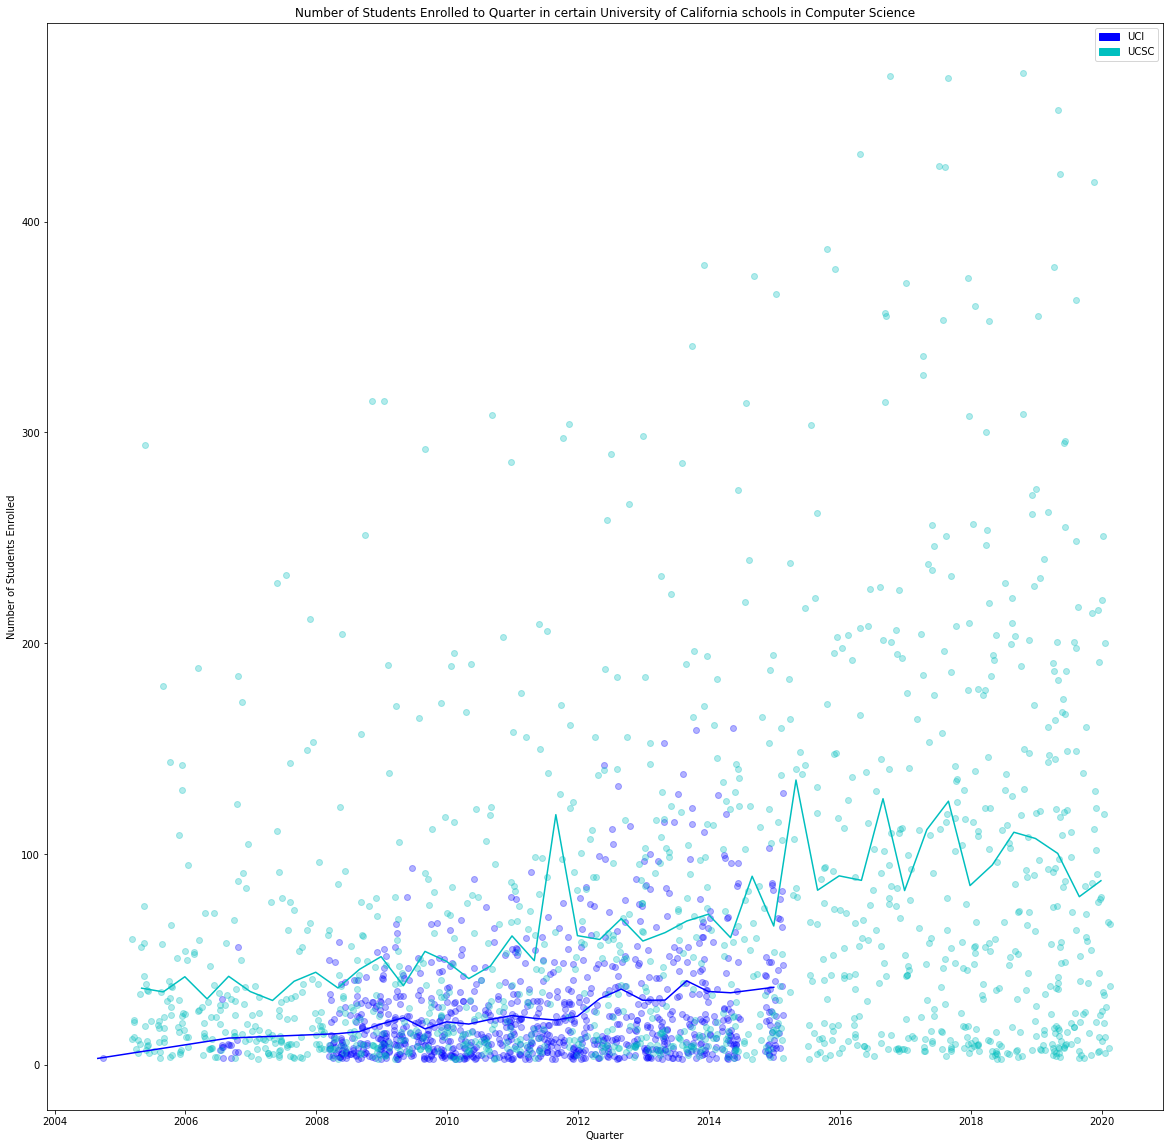

In [30]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

uci_jitter, uci_n_jitter = jitter(df_uci['term_num'], .3), jitter(df_uci['num_people_enrolled'], 1)
ucsc_jitter, ucsc_n_jitter = jitter(df_ucsc['term_num'], .3), jitter(df_ucsc['num_people_enrolled'], 1)

axes.scatter(uci_jitter , uci_n_jitter, alpha = .3, color = 'b')
axes.scatter(ucsc_jitter, ucsc_n_jitter, alpha = .3, color = 'c')

axes.plot(df_uci['term_num'].unique(), avg(df_uci), 'b-')
axes.plot(df_ucsc['term_num'].unique(), avg(df_ucsc), 'c-')

uci_patch = mpatches.Patch(color='b', label='UCI')
ucsc_patch = mpatches.Patch(color='c', label='UCSC')
plt.legend(handles=[uci_patch, ucsc_patch])

axes.set_title('Number of Students Enrolled to Quarter in certain University of California schools in Computer Science')
axes.set_xlabel('Quarter')
axes.set_ylabel('Number of Students Enrolled')

Text(0, 0.5, 'Number of Students Enrolled')

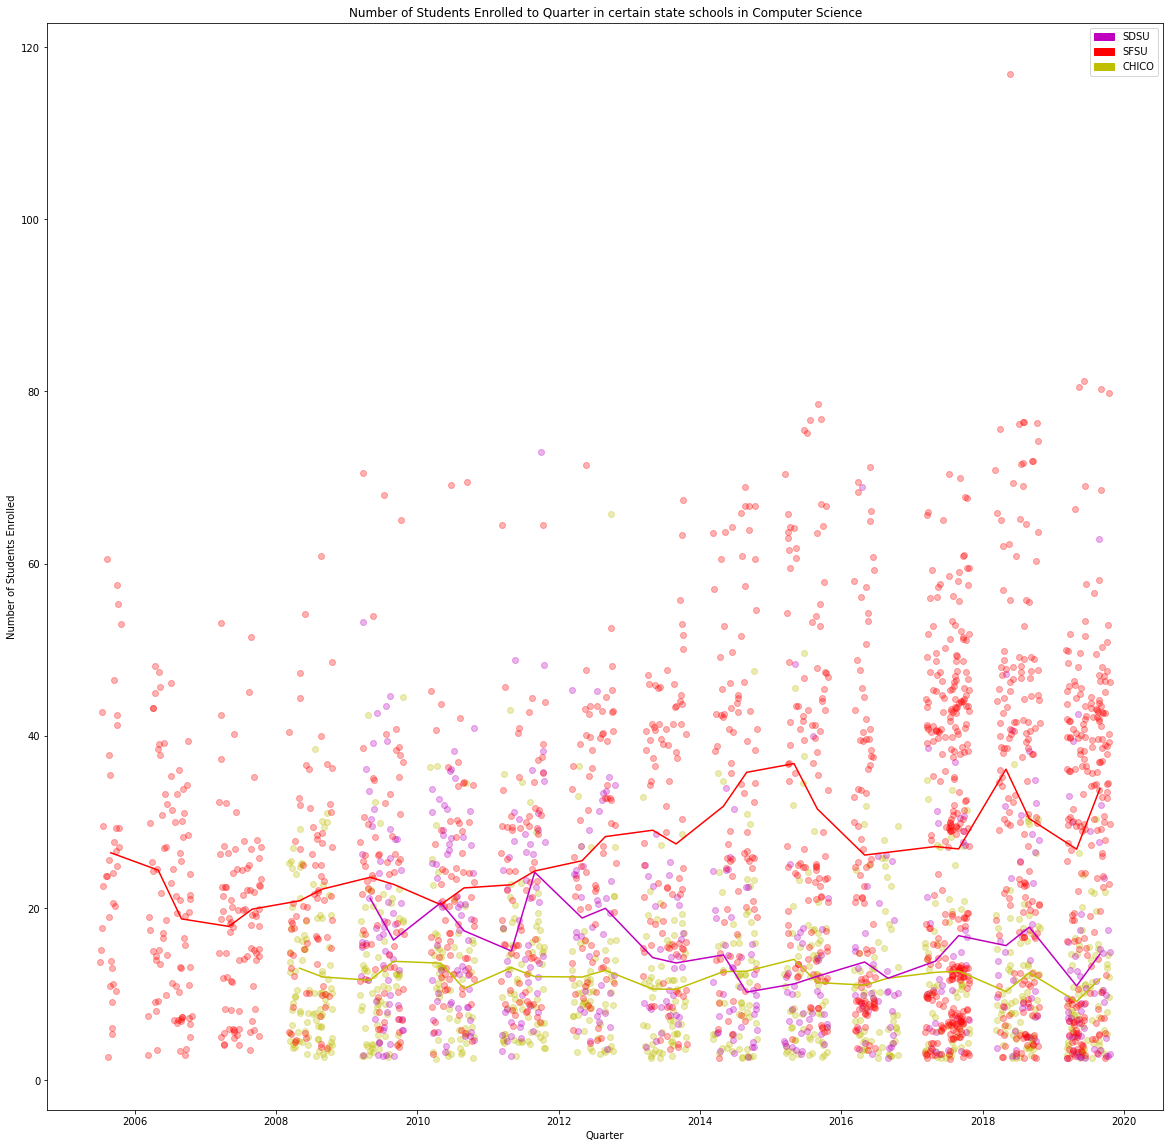

In [31]:
fig, axes = plt.subplots(1,1, figsize=(20,20))
chico_jitter, chico_n_jitter = jitter(df_chico['term_num'], .3), jitter(df_chico['num_people_enrolled'], 1)
sdsu_jitter, sdsu_n_jitter = jitter(df_sdsu['term_num'], .3), jitter(df_sdsu['num_people_enrolled'], 1)
sfsu_jitter, sfsu_n_jitter = jitter(df_sfsu['term_num'], .3), jitter(df_sfsu['num_people_enrolled'], 1)

axes.scatter(chico_jitter, chico_n_jitter, alpha = .3, color = 'y')
axes.scatter(sdsu_jitter, sdsu_n_jitter, alpha = .3, color = 'm')
axes.scatter(sfsu_jitter, sfsu_n_jitter, alpha = .3, color = 'r')

axes.plot(df_chico['term_num'].unique(), avg(df_chico), 'y-')
axes.plot(df_sdsu['term_num'].unique(), avg(df_sdsu), 'm-')
axes.plot(df_sfsu['term_num'].unique(), avg(df_sfsu), 'r-')


chico_patch = mpatches.Patch(color='y', label='CHICO')
sdsu_patch = mpatches.Patch(color='m', label='SDSU')
sfsu_patch = mpatches.Patch(color='r', label='SFSU')

plt.legend(handles=[sdsu_patch, sfsu_patch, chico_patch])

axes.set_title('Number of Students Enrolled to Quarter in certain state schools in Computer Science')
axes.set_xlabel('Quarter')
axes.set_ylabel('Number of Students Enrolled')


Text(0, 0.5, 'Number of Students Enrolled')

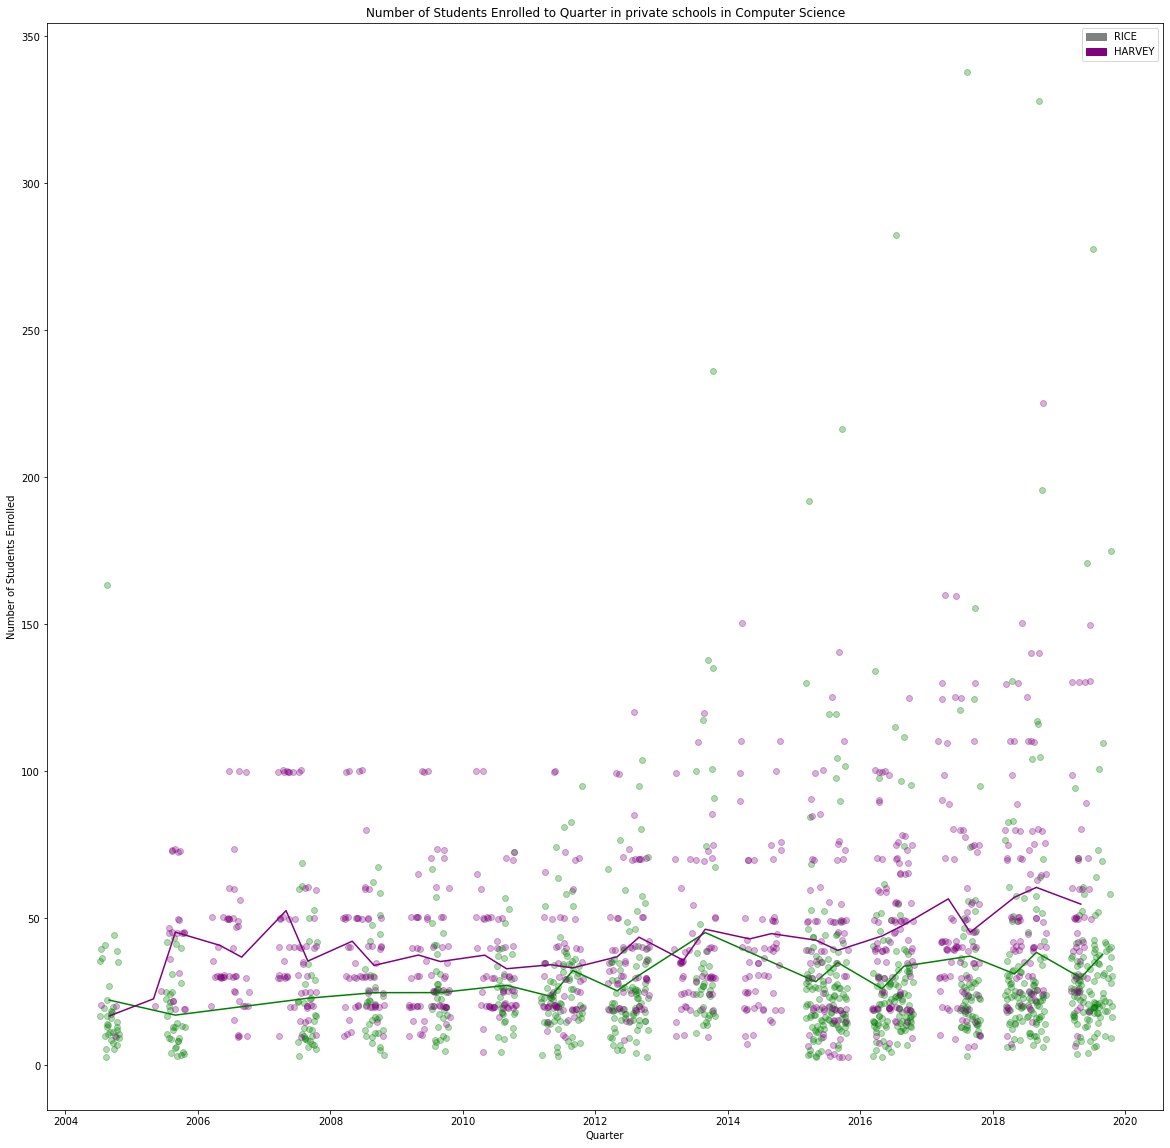

In [32]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

harvey_jitter, harvey_n_jitter = jitter(df_harvey['term_num'], .3), jitter(df_harvey['num_people_enrolled'], 1)
rice_jitter, rice_n_jitter = jitter(df_rice['term_num'], .3), jitter(df_rice['num_people_enrolled'], 1)

axes.scatter(harvey_jitter, harvey_n_jitter, alpha = .3, color = 'g')
axes.scatter(rice_jitter, rice_n_jitter, alpha = .3, color = 'purple')

axes.plot(df_harvey['term_num'].unique(), avg(df_harvey), 'g-')
axes.plot(df_rice['term_num'].unique(), avg(df_rice), 'purple')

rice_patch = mpatches.Patch(color = 'grey', label = 'RICE')
harvey_patch = mpatches.Patch(color = 'purple', label  = 'HARVEY')

plt.legend(handles=[rice_patch, harvey_patch])

axes.set_title('Number of Students Enrolled to Quarter in private schools in Computer Science')
axes.set_xlabel('Quarter')
axes.set_ylabel('Number of Students Enrolled')



In [33]:
def find_popular_class(self):
    unique_classes = {}
    difference_list = list()
    for i in self['class_number']:
        if i not in unique_classes:
            unique_classes.update({i: 1})
        else:
            unique_classes.update({i: unique_classes.get(i) + 1})
    class_popular = {}
    for i in unique_classes:
        if unique_classes.get(i) > 7 and unique_classes.get(i) < 15:
            class_popular.update({i:unique_classes.get(i)})
    for i in class_popular:
        this_class = self[self['class_number'] == i]
        percent_lower = 0
        percent_upper = 0
        lower = len(this_class)/2
        top = len(this_class)
        for i in range(int(lower)):
            percent_lower += this_class.iloc[i]['num_people_enrolled']
        for i in range(int(lower), int(top)):
            percent_upper += this_class.iloc[i]['num_people_enrolled']
        percent_lower /= int(lower)
        percent_upper /= int(top) - int(lower)
        difference = percent_upper - percent_lower
        difference_list.append((difference, this_class))
    difference_list = sorted(difference_list, key = lambda x: x[0], reverse = False)
    
    popular_classes = list()
    for percent, actual_class in difference_list[-5:]:
        popular_classes.append(actual_class)
    return(popular_classes)

#find_popular_class(df_ucsc) #ucsc 181, 116, 122 Computer Security, Databases, software engineering
#find_popular_class(df_sdsu) # 537 - PROGRAMMING FOR GIS, software engineering - 532, 503 Databases
#find_popular_class(df_uci)  #uci 35320 DataMining, intro to data mgmt 34200 (databases), Computer Security, 34350 AI
#find_popular_class(df_chico) #430 software engineering, intro unix 144
#find_popular_class(df_harvey) #neural networks 152, Computer networks 125, Machine Learning
#find_popular_class(df_sfsu) #212 software engineering # 656 Computer Organization # 305 Social and ethical computing,
#Computer eval 641

In [34]:
# Adds teh average number of students enrolled by year 

Text(0, 0.5, 'Number of Students Enrolled')

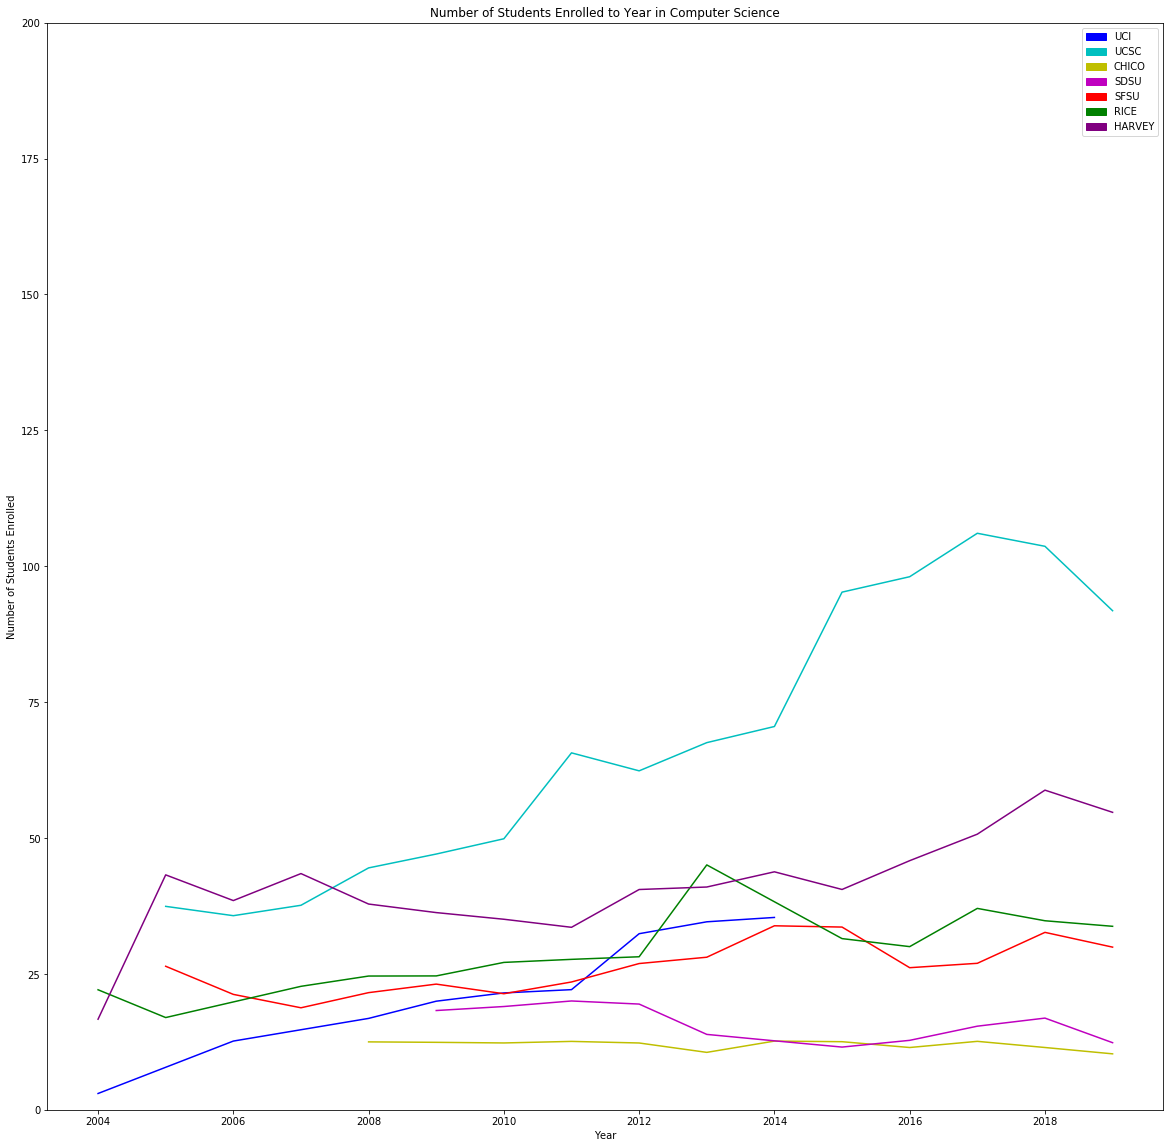

In [41]:
fig, axes = plt.subplots(1,1, figsize=(20,20))
plt.ylim((0,200))

axes.plot(df_uci['year'].unique(), avg(df_uci, to_avg = 'year'), 'b-')
axes.plot(df_ucsc['year'].unique(), avg(df_ucsc, to_avg = 'year'), 'c-')
axes.plot(df_chico['year'].unique(), avg(df_chico, to_avg = 'year'), 'y-')
axes.plot(df_sdsu['year'].unique(), avg(df_sdsu, to_avg = 'year'), 'm-')
axes.plot(df_sfsu['year'].unique(), avg(df_sfsu, to_avg = 'year'), 'r-')
axes.plot(df_harvey['year'].unique(), avg(df_harvey, to_avg = 'year'), 'g-')
axes.plot(df_rice['year'].unique(), avg(df_rice, to_avg = 'year'), 'purple')

uci_patch = mpatches.Patch(color='b', label='UCI')
ucsc_patch = mpatches.Patch(color='c', label='UCSC')
chico_patch = mpatches.Patch(color='y', label='CHICO')
sdsu_patch = mpatches.Patch(color='m', label='SDSU')
sfsu_patch = mpatches.Patch(color='r', label='SFSU')
rice_patch = mpatches.Patch(color = 'g', label = 'RICE')
harvey_patch = mpatches.Patch(color = 'purple', label  = 'HARVEY')
plt.legend(handles=[uci_patch, ucsc_patch, chico_patch, sdsu_patch, sfsu_patch, rice_patch, harvey_patch])

axes.set_title('Number of Students Enrolled to Year in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Students Enrolled')

In [ ]:
# Adds the scatter plots in terms of year for every school in UC, State, and private schools

Text(0, 0.5, 'Number of Students Enrolled')

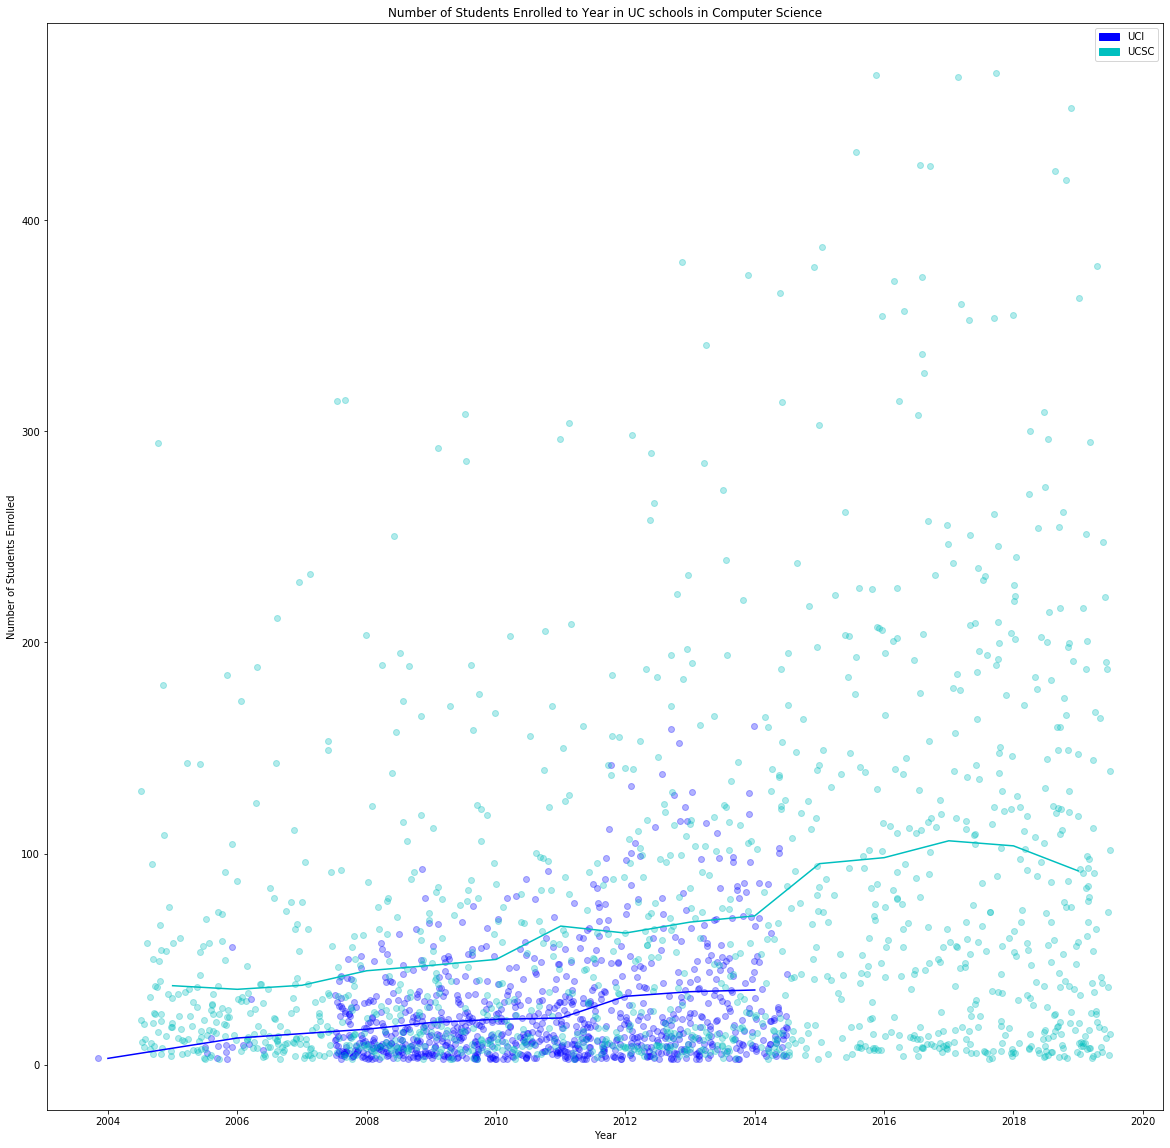

In [36]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

uci_jitter, uci_n_jitter = jitter(df_uci['year'], 1), jitter(df_uci['num_people_enrolled'], 1)
ucsc_jitter, ucsc_n_jitter = jitter(df_ucsc['year'], 1), jitter(df_ucsc['num_people_enrolled'], 1)

axes.scatter(uci_jitter , uci_n_jitter, alpha = .3, color = 'b')
axes.scatter(ucsc_jitter, ucsc_n_jitter, alpha = .3, color = 'c')

axes.plot(df_uci['year'].unique(), avg(df_uci, to_avg = 'year'), 'b-')
axes.plot(df_ucsc['year'].unique(), avg(df_ucsc, to_avg = 'year'), 'c-')

uci_patch = mpatches.Patch(color='b', label='UCI')
ucsc_patch = mpatches.Patch(color='c', label='UCSC')



plt.legend(handles=[uci_patch, ucsc_patch])


axes.set_title('Number of Students Enrolled to Year in UC schools in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Students Enrolled')

Text(0, 0.5, 'Number of Students Enrolled')

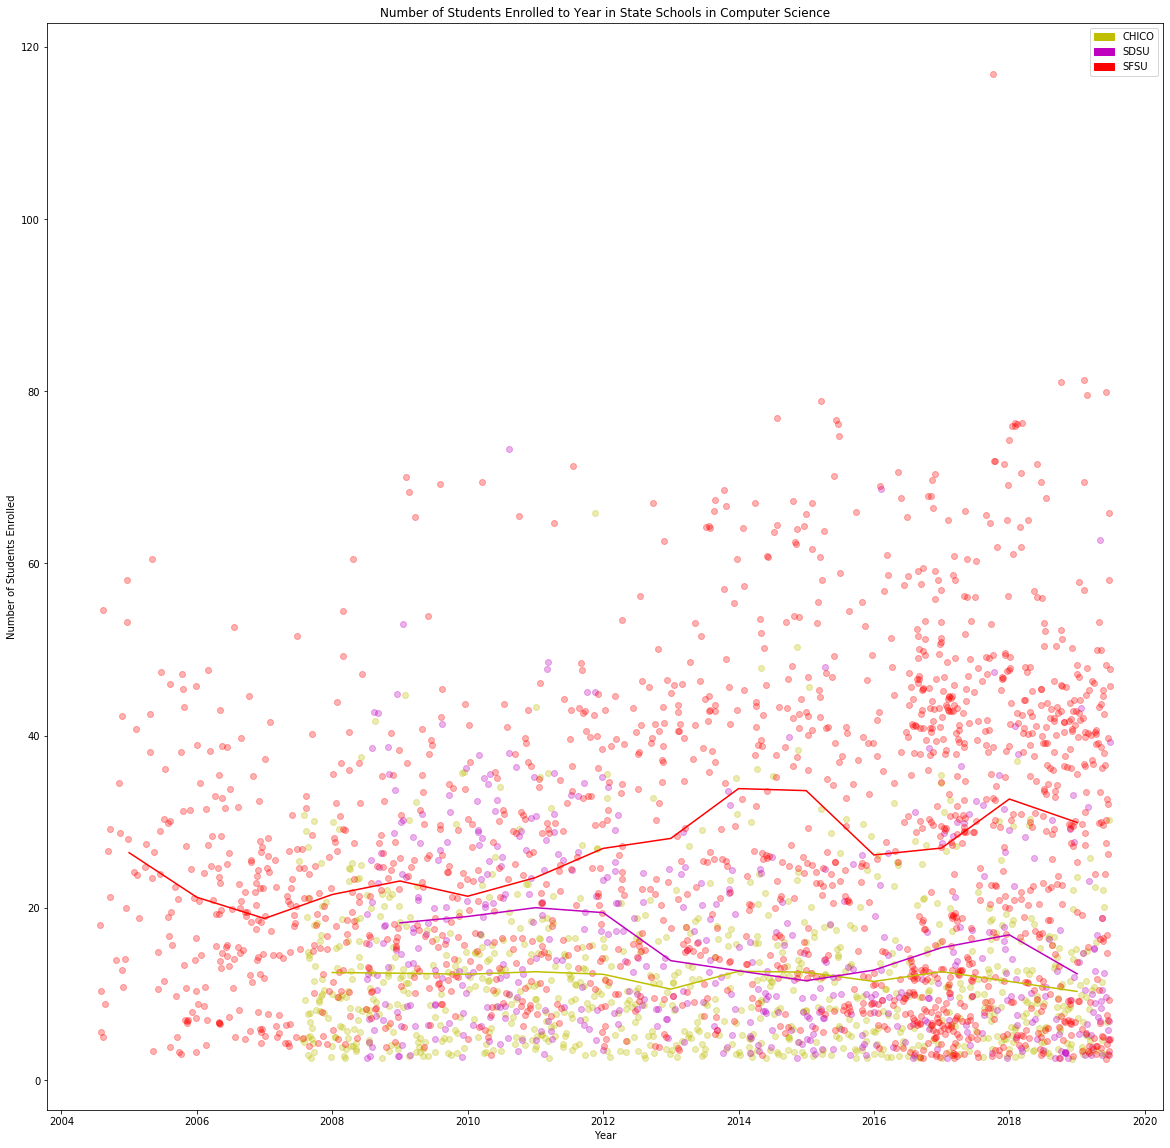

In [37]:
fig, axes = plt.subplots(1,1, figsize=(20,20))
chico_jitter, chico_n_jitter = jitter(df_chico['year'], 1), jitter(df_chico['num_people_enrolled'], 1)
sdsu_jitter, sdsu_n_jitter = jitter(df_sdsu['year'], 1), jitter(df_sdsu['num_people_enrolled'], 1)
sfsu_jitter, sfsu_n_jitter = jitter(df_sfsu['year'], 1), jitter(df_sfsu['num_people_enrolled'], 1)

axes.scatter(chico_jitter, chico_n_jitter, alpha = .3, color = 'y')
axes.scatter(sdsu_jitter, sdsu_n_jitter, alpha = .3, color = 'm')
axes.scatter(sfsu_jitter, sfsu_n_jitter, alpha = .3, color = 'r')

axes.plot(df_chico['year'].unique(), avg(df_chico, to_avg = 'year'), 'y-')
axes.plot(df_sdsu['year'].unique(), avg(df_sdsu, to_avg = 'year'), 'm-')
axes.plot(df_sfsu['year'].unique(), avg(df_sfsu, to_avg = 'year'), 'r-')

chico_patch = mpatches.Patch(color='y', label='CHICO')
sdsu_patch = mpatches.Patch(color='m', label='SDSU')
sfsu_patch = mpatches.Patch(color='r', label='SFSU')

plt.legend(handles=[chico_patch, sdsu_patch, sfsu_patch])
axes.set_title('Number of Students Enrolled to Year in State Schools in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Students Enrolled')

Text(0, 0.5, 'Number of Students Enrolled')

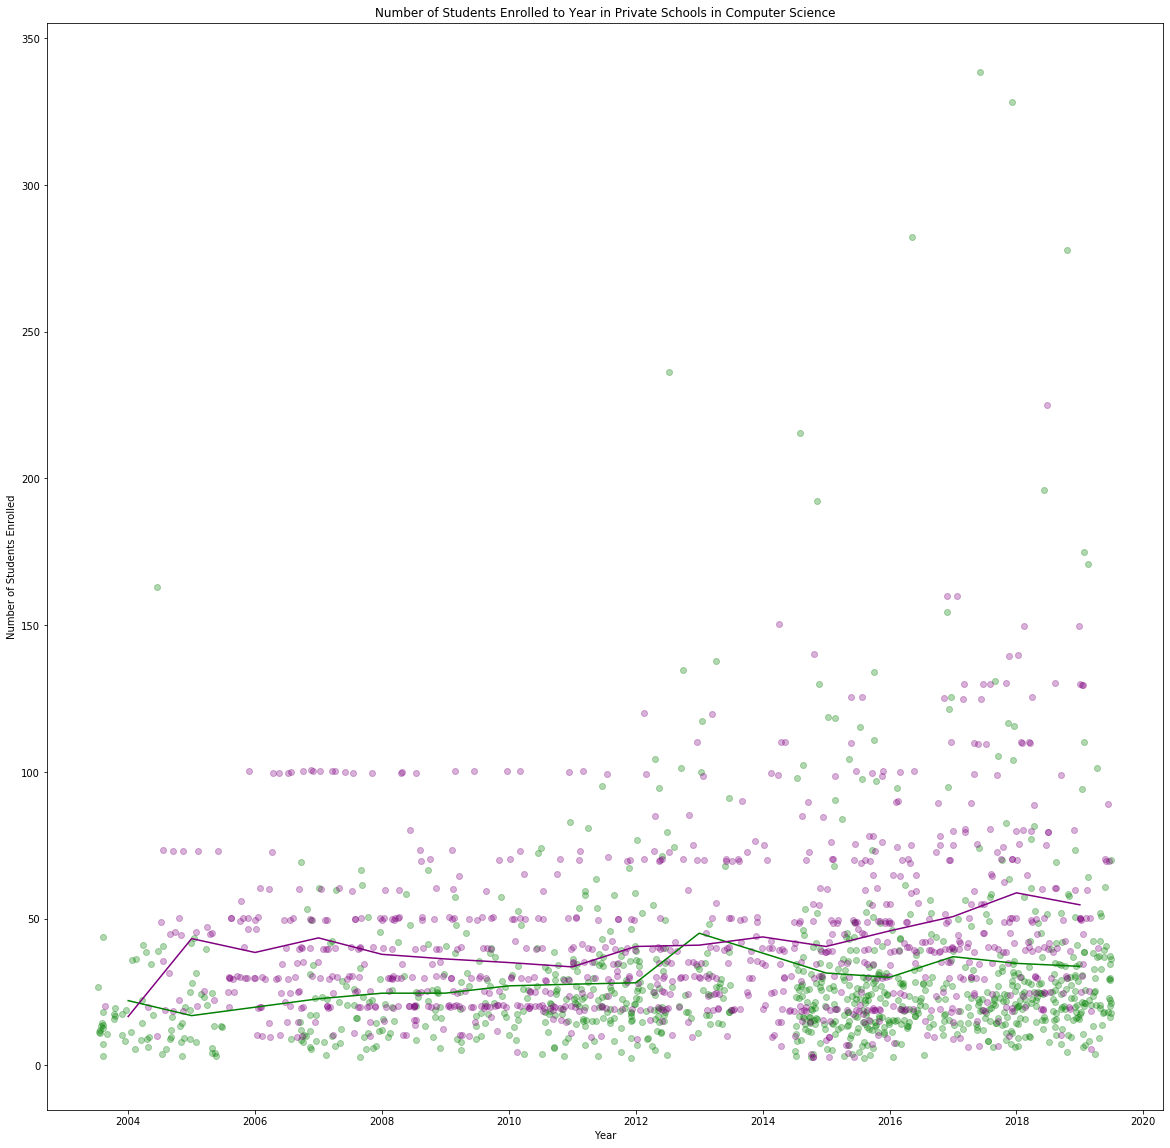

In [38]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

harvey_jitter, harvey_n_jitter = jitter(df_harvey['year'], 1), jitter(df_harvey['num_people_enrolled'], 1)
rice_jitter, rice_n_jitter = jitter(df_rice['year'], 1), jitter(df_rice['num_people_enrolled'], 1)

axes.scatter(harvey_jitter, harvey_n_jitter, alpha = .3, color = 'g')
axes.scatter(rice_jitter, rice_n_jitter, alpha = .3, color = 'purple')

axes.plot(df_harvey['year'].unique(), avg(df_harvey, to_avg = 'year'), 'g-')
axes.plot(df_rice['year'].unique(), avg(df_rice, to_avg = 'year'), 'purple')

rice_patch = mpatches.Patch(color = 'g', label = 'RICE')
harvey_patch = mpatches.Patch(color = 'purple', label  = 'HARVEY')

axes.set_title('Number of Students Enrolled to Year in Private Schools in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Number of Students Enrolled')

In [ ]:
# Adds the percentages to a graph without scatter, for every year

Text(0, 0.5, 'Percent of Students Enrolled')

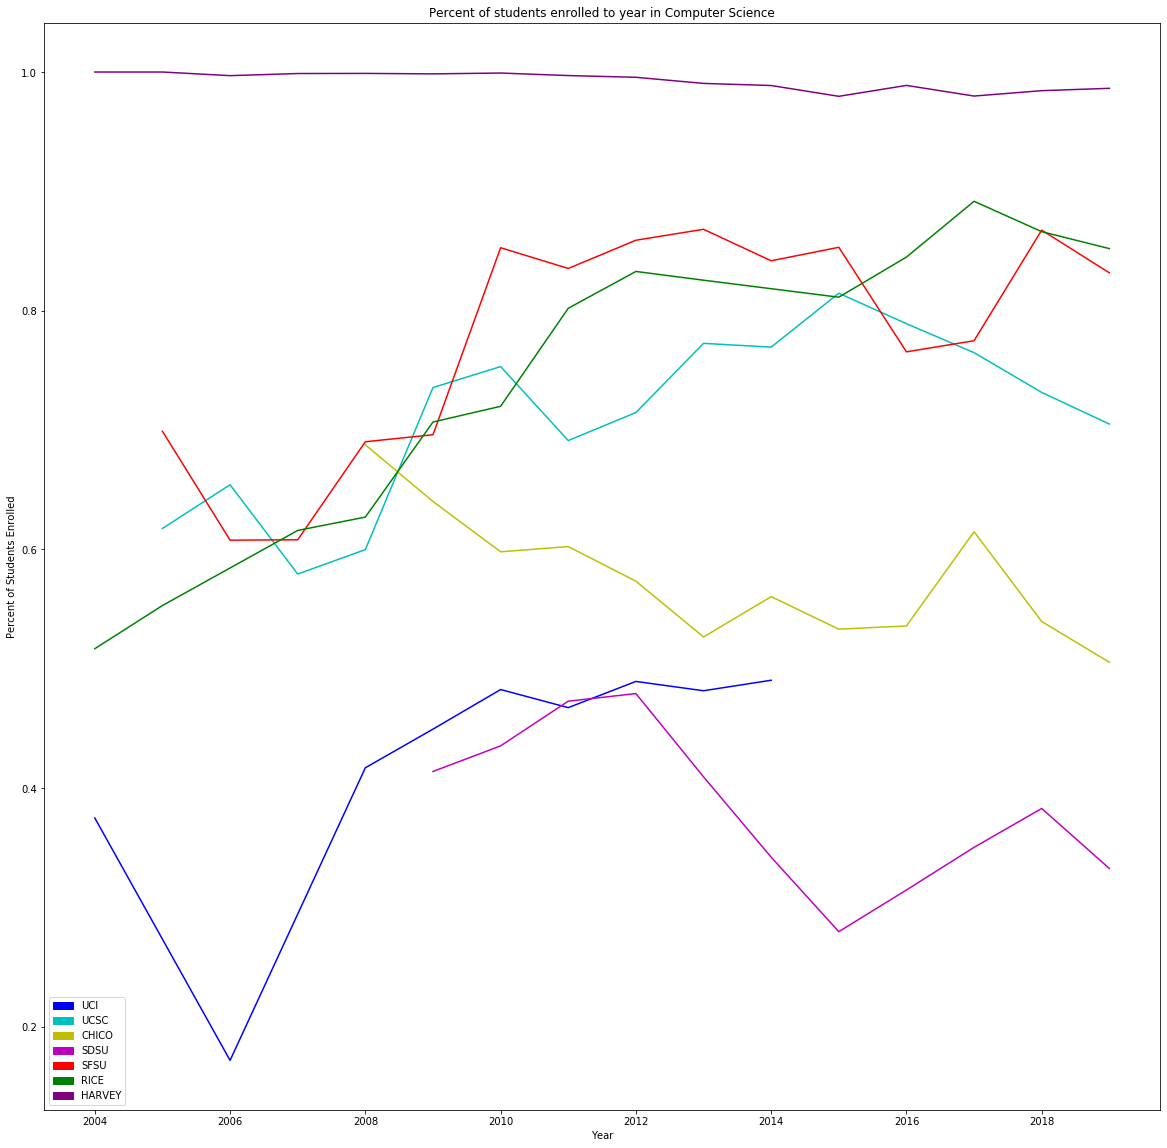

In [44]:
fig, axes = plt.subplots(1,1, figsize=(20,20))

'''
uci_jitter, uci_n_jitter = jitter(df_uci['year'], 1), jitter(df_uci['Percentage'], .01)
ucsc_jitter, ucsc_n_jitter = jitter(df_ucsc['year'], 1), jitter(df_ucsc['Percentage'], .01)
chico_jitter, chico_n_jitter = jitter(df_chico['year'], 1), jitter(df_chico['Percentage'], .01)
sdsu_jitter, sdsu_n_jitter = jitter(df_sdsu['year'], 1), jitter(df_sdsu['Percentage'], .01)
sfsu_jitter, sfsu_n_jitter = jitter(df_sfsu['year'], 1), jitter(df_sfsu['Percentage'], .01)
harvey_jitter, harvey_n_jitter = jitter(df_harvey['year'], 1), jitter(df_harvey['Percentage'], .01)
rice_jitter, rice_n_jitter = jitter(df_rice['year'], 1), jitter(df_rice['Percentage'], .01)


axes.scatter(uci_jitter , uci_n_jitter, alpha = .3, color = 'b')
axes.scatter(ucsc_jitter, ucsc_n_jitter, alpha = .3, color = 'c')
axes.scatter(chico_jitter, chico_n_jitter, alpha = .3, color = 'y')
axes.scatter(sdsu_jitter, sdsu_n_jitter, alpha = .3, color = 'm')
axes.scatter(sfsu_jitter, sfsu_n_jitter, alpha = .3, color = 'r')
axes.scatter(harvey_jitter, harvey_n_jitter, alpha = .3, color = 'g')
axes.scatter(rice_jitter, rice_n_jitter, alpha = .3, color = 'purple')
'''

axes.plot(df_uci['year'].unique(), avg(df_uci,'year', data_avg = 'Percentage'), 'b', ls = '-')
axes.plot(df_ucsc['year'].unique(), avg(df_ucsc, 'year', data_avg ='Percentage'), 'c', ls = '-')
axes.plot(df_chico['year'].unique(), avg(df_chico, 'year', data_avg ='Percentage'), 'y', ls = '-')
axes.plot(df_sdsu['year'].unique(), avg(df_sdsu, 'year', data_avg ='Percentage'), 'm', ls = '-')
axes.plot(df_sfsu['year'].unique(), avg(df_sfsu, 'year', data_avg ='Percentage'), 'r', ls = '-')
axes.plot(df_harvey['year'].unique(), avg(df_harvey, 'year', data_avg ='Percentage'), 'g', ls = '-')
axes.plot(df_rice['year'].unique(), avg(df_rice, 'year', data_avg ='Percentage'), 'purple', ls = '-')


uci_patch = mpatches.Patch(color='b', label='UCI')
ucsc_patch = mpatches.Patch(color='c', label='UCSC')
chico_patch = mpatches.Patch(color='y', label='CHICO')
sdsu_patch = mpatches.Patch(color='m', label='SDSU')
sfsu_patch = mpatches.Patch(color='r', label='SFSU')
rice_patch = mpatches.Patch(color = 'g', label = 'RICE')
harvey_patch = mpatches.Patch(color = 'purple', label  = 'HARVEY')

plt.legend(handles=[uci_patch, ucsc_patch, chico_patch, sdsu_patch, sfsu_patch, rice_patch, harvey_patch])

axes.set_title('Percent of students enrolled to year in Computer Science')
axes.set_xlabel('Year')
axes.set_ylabel('Percent of Students Enrolled')